In [146]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X=pd.read_csv('gamma.csv')
X['class'] = X['class'].replace(['h', 'g'], [0, 1])
y = X['class']
X = X.drop('class', axis = 1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [271]:
def get_nb_scores(features):    
    if features == []:
        X_train_modif = X_train
        X_test_modif = X_test
        print('Features: all.')
    else:
        X_train_modif = X_train[features]
        X_test_modif = X_test[features] 
        print('Features: %s' % ', '.join(map(str, features)) + '.')
    
    model = GaussianNB()
    model.fit(X_train_modif, y_train)

    train_proba = model.fit(X_train_modif, y_train).predict_proba(X_train_modif)
    test_proba = model.fit(X_train_modif, y_train).predict_proba(X_test_modif)

    print("AUC: %5f" % roc_auc_score(y_test, test_proba[:,1]))
    print("Accuracy: %5f" % model.score(X_test_modif,y_test))
    print()

In [272]:
get_nb_scores([])

Features: all.
AUC: 0.760011
Accuracy: 0.727480



Pogledajmo koje su značajke značajnije pomoću ExtraTreesClassifier i testirajmo algoritam na restringirani podatkovni skup.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


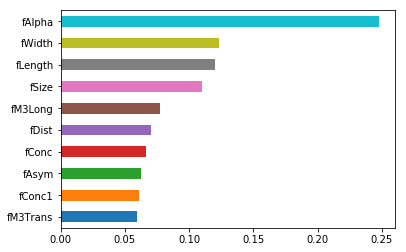

In [221]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [291]:
get_nb_scores(['fAlpha'])
get_nb_scores(['fAlpha', 'fWidth'])
get_nb_scores(['fAlpha', 'fWidth', 'fLength'])
get_nb_scores(['fAlpha', 'fWidth', 'fLength', 'fSize'])
get_nb_scores(['fAlpha', 'fWidth', 'fLength', 'fSize', 'fM3Long'])

Features: fAlpha.
AUC: 0.789210
Accuracy: 0.735892

Features: fAlpha, fWidth.
AUC: 0.813838
Accuracy: 0.754644

Features: fAlpha, fWidth, fLength.
AUC: 0.808105
Accuracy: 0.753768

Features: fAlpha, fWidth, fLength, fSize.
AUC: 0.798802
Accuracy: 0.749036

Features: fAlpha, fWidth, fLength, fSize, fM3Long.
AUC: 0.786097
Accuracy: 0.744479



Najbolji AUC sa naivnim Bayesom dobile smo sa samo dvije značajke - fAlpha i fWidth.

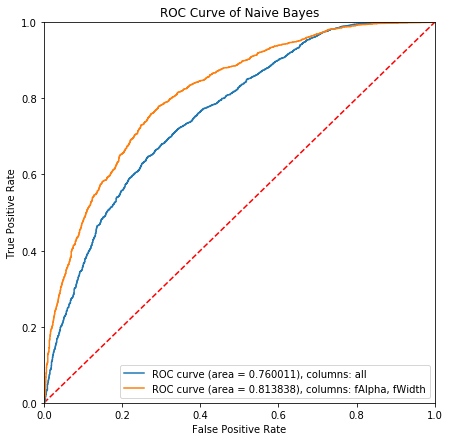

In [304]:
plt.figure(figsize=(7,7))

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')

selected_features = [[], ['fAlpha', 'fWidth']]

for features in selected_features:
    if features == []:
        X_train_modif = X_train
        X_test_modif = X_test
        s = 'all'
    else:
        X_train_modif = X_train[features]
        X_test_modif = X_test[features] 
        s = '%s' % ', '.join(map(str, features))
    
    model = GaussianNB()
    model.fit(X_train_modif, y_train)
    
    fit = model.fit(X_train_modif, y_train)
    train_proba = fit.predict_proba(X_train_modif)
    test_proba = fit.predict_proba(X_test_modif)
    
    fpr, tpr, threshold = roc_curve(y_test, test_proba[:,1])
    
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label = 'ROC curve (area = %5f), columns: %s' % (roc_auc, s))

plt.legend(loc = 'lower right')
plt.show() 

Matrica konfuzije.

In [305]:
from sklearn.metrics import confusion_matrix

y_pred = fit.predict(X_test_modif)
confusion_matrix(y_test,y_pred)

array([[ 929, 1072],
       [ 328, 3377]], dtype=int64)